# Car Price Prediction

###   Import libraries

In [321]:
import pandas as pd
import numpy as np

import datetime
import seaborn as sns
%matplotlib inline
import os
from math import sqrt
import pickle
import warnings
warnings.filterwarnings('ignore')

###   Import dataset

In [173]:
car = pd.read_csv('dataset.csv')

In [322]:
car.head()

,index,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,6,Ford Figo,Ford,2012,175000,41000,Diesel


In [44]:
car.shape

(892, 6)

In [180]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


####  Checking for Null Values

In [323]:
car.isnull().sum()

index         0
name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

####   Viewing all columns

In [315]:
car.columns

Index(['index', 'name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

###         Data Visualization

####  Plotting the Bar Graph with count of cars based on the Manufacturer and confirm that there are no null values and identify all the unique values from the Manufacturer and saving the png file

In [331]:
production = car['name'].str.split(' ',expand=True)
car['production'] = production[0]

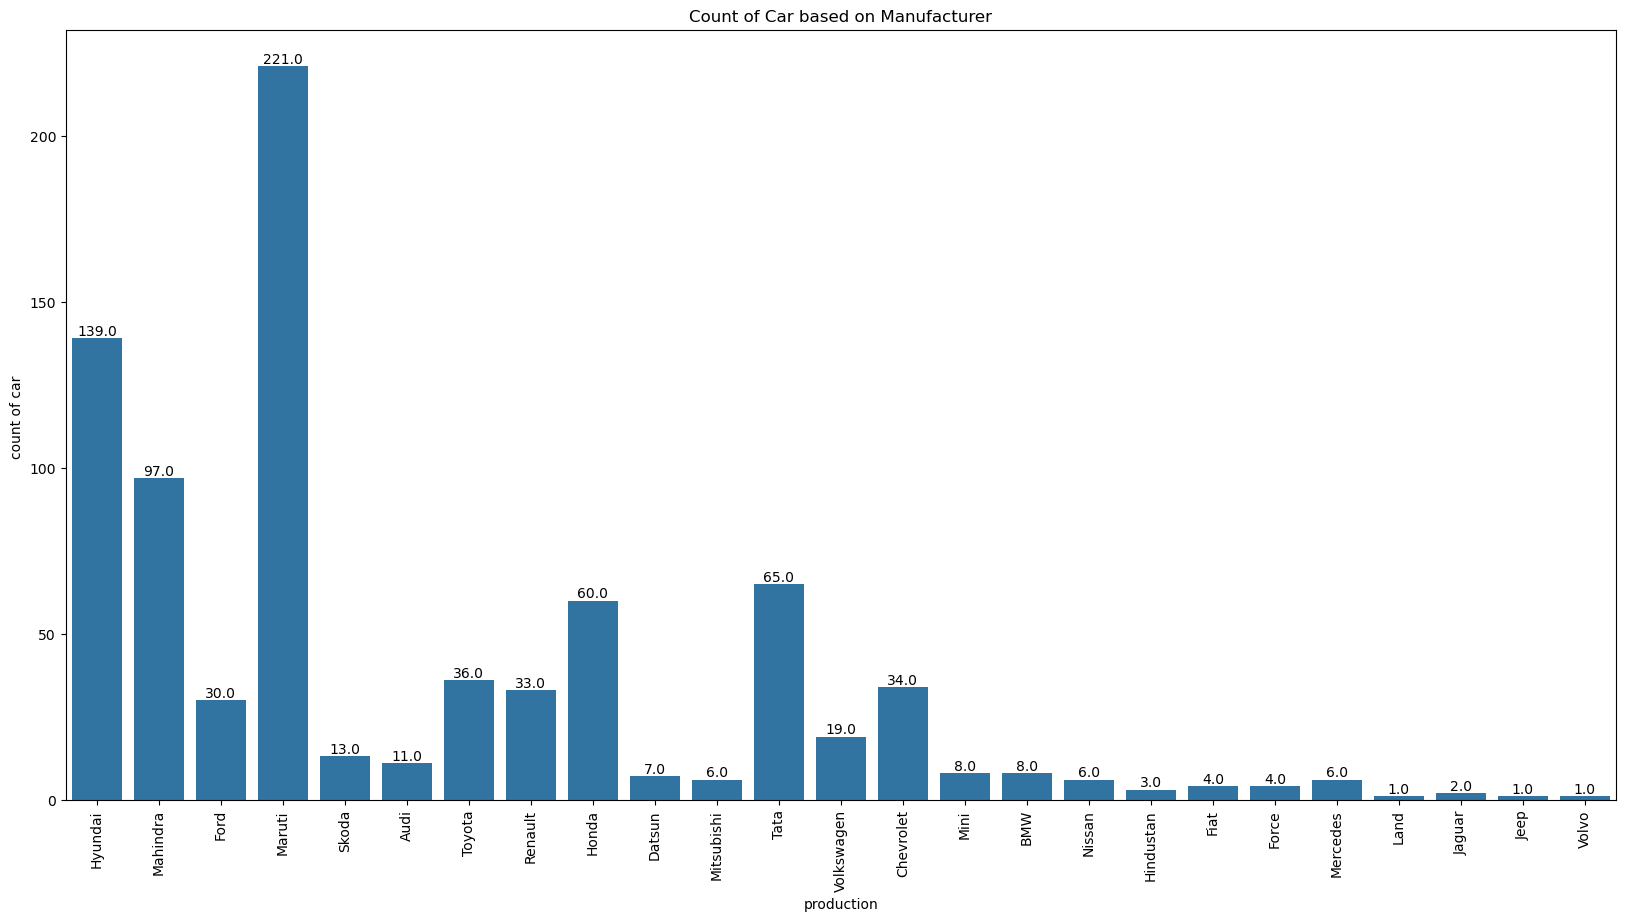

In [336]:
plt.rcParams['figure.figsize']=(20,10)
plot = sns.countplot(x='production', data = car)
plt.xticks(rotation=90)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.0,p.get_height()),
                  ha='center',va='center',xytext=(0,5),textcoords='offset points')

plt.title('Count of Car based on Manufacturer')
plt.xlabel('production')
plt.ylabel('count of car ')

plt.savefig('Count of Car.png')
plt.show()

### Cleaning Data 

In [23]:
# create a backup copy  

In [175]:
backup = car.copy()

In [177]:
car = car[car['year'].str.isnumeric()]

In [345]:
car['year'] = car['year'].astype(int) 

In [346]:
car = car[car['Price']!="Ask For Price"]  # and put in back in car 
car['Price'] = car['Price'].str.replace(',','').astype(int)

AttributeError: Can only use .str accessor with string values!

In [203]:
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)

In [211]:
car = car[~car['fuel_type'].isna()]  # In fuel type nan value ko remove operation

In [221]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [224]:
car.reset_index(drop=True)  # this is cleaned data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


####  View Statistics

In [225]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [229]:
# write those car more than 60 lakh
# car[car['Price']>6e6]
car = car[car['Price']<6e6].reset_index(drop=True)

In [342]:
car   # final cleaned data

,index,name,company,year,Price,kms_driven,fuel_type,production
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol,Hyundai
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,Mahindra
2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol,Hyundai
3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel,Ford
4,6,Ford Figo,Ford,2012,175000,41000,Diesel,Ford
...,...,...,...,...,...,...,...,...
810,883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol,Maruti
811,885,Tata Indica V2,Tata,2009,110000,30000,Diesel,Tata
812,886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol,Toyota
813,888,Tata Zest XM,Tata,2018,260000,27000,Diesel,Tata


In [310]:
# Descriptive statistical summary of categorical features
car.describe(include= 'object')

,name,company,fuel_type
count,815,815,815
unique,254,25,3
top,Maruti Suzuki Swift,Maruti,Petrol
freq,51,221,428


In [234]:
# store data into csv file
# to_csv function used for create csv file
car.to_csv('Cleaned Car.csv')

###  Building Machine learning model

#### Creating X and y matrix

In [347]:
X = car.drop(columns = 'Price') # In X all columns are present eccept price column
y = car['Price'] # y pe only price columns are present

#### Splitting X and y into training set and testing set 

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.2)

In [348]:
#  Importing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [241]:
# create object onehotencoder
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [249]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [250]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                       remainder='passthrough')

In [251]:
lr =LinearRegression()

In [252]:
pipe = make_pipeline(column_trans,lr)

In [364]:
pipe.fit(X_train,y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [254]:
y_pred = pipe.predict(X_test)

In [274]:
y_pred

array([ 154386.43752544,  360370.05544491,  271467.67698321,
        734952.50562073,  135104.20021003,  220772.06181151,
        417057.32529215,  358258.37166422,  223190.8759496 ,
        307553.1590423 ,  363102.48315445,  240669.2730165 ,
        209085.51158941,  567530.28683255,  593393.39605515,
        401529.62438475,  209603.28352772,  230281.71425319,
        293550.64260238,  194021.13683748,  369383.73305239,
         45021.59387571,  381469.4513796 ,  196786.64080867,
        -43272.08107328,  443678.77100137,  268139.57323933,
        521014.94071037,  311321.45549762,   58322.63643183,
        526376.59423608,  217993.30353687,  439970.7514478 ,
        247420.02184439,  -38074.64920931,   30447.04225636,
        556084.60126853,  144084.16866522,  505130.44765296,
        607054.17352667,  415248.52368623,  237389.03313042,
        188227.30221448,  283815.12836359,  516705.95338874,
        270164.38859581,  -38011.08780255,  315662.47145279,
        486318.43148705,

In [299]:
r2_score(y_test,y_pred)

0.5967423182648407

In [300]:
scores=[]
for i in range(1000):
    X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=i)
    lr =LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [270]:
# find train split jisme maximum r2 score, for that random_state use 
np.argmax(scores)

433

In [283]:
scores[np.argmax(scores)]

0.84118838903865

In [284]:
X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=i)
lr =LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.5967423182648407

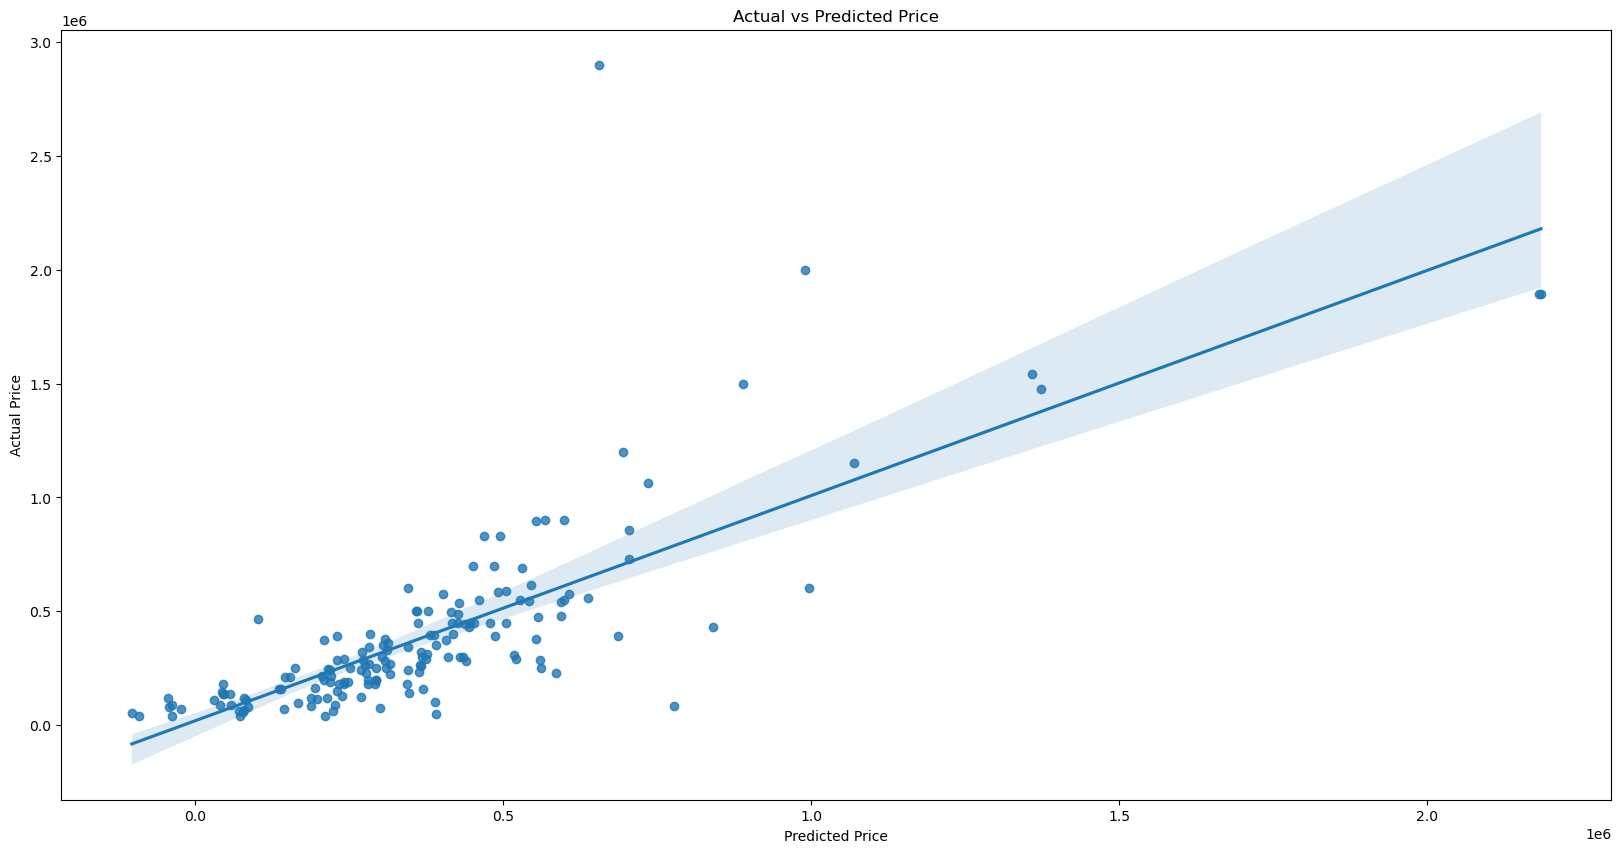

In [354]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs Predicted Price")

plt.savefig('Actual vs Predicted Price.png')
plt.show()

In [352]:
# dump this pipeline using pickel
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))